# Exploratory Data Analysis

In [31]:
import pandas as pd 
import numpy as np
from datetime import date

TSA_DATA_PATH = '../data/tsa_checkins.csv'

## Understanding the Data  

In [32]:
# Loading data
checkin_data = pd.read_csv(TSA_DATA_PATH, index_col=0)

<Axes: title={'center': 'Checkins'}, xlabel='Date'>

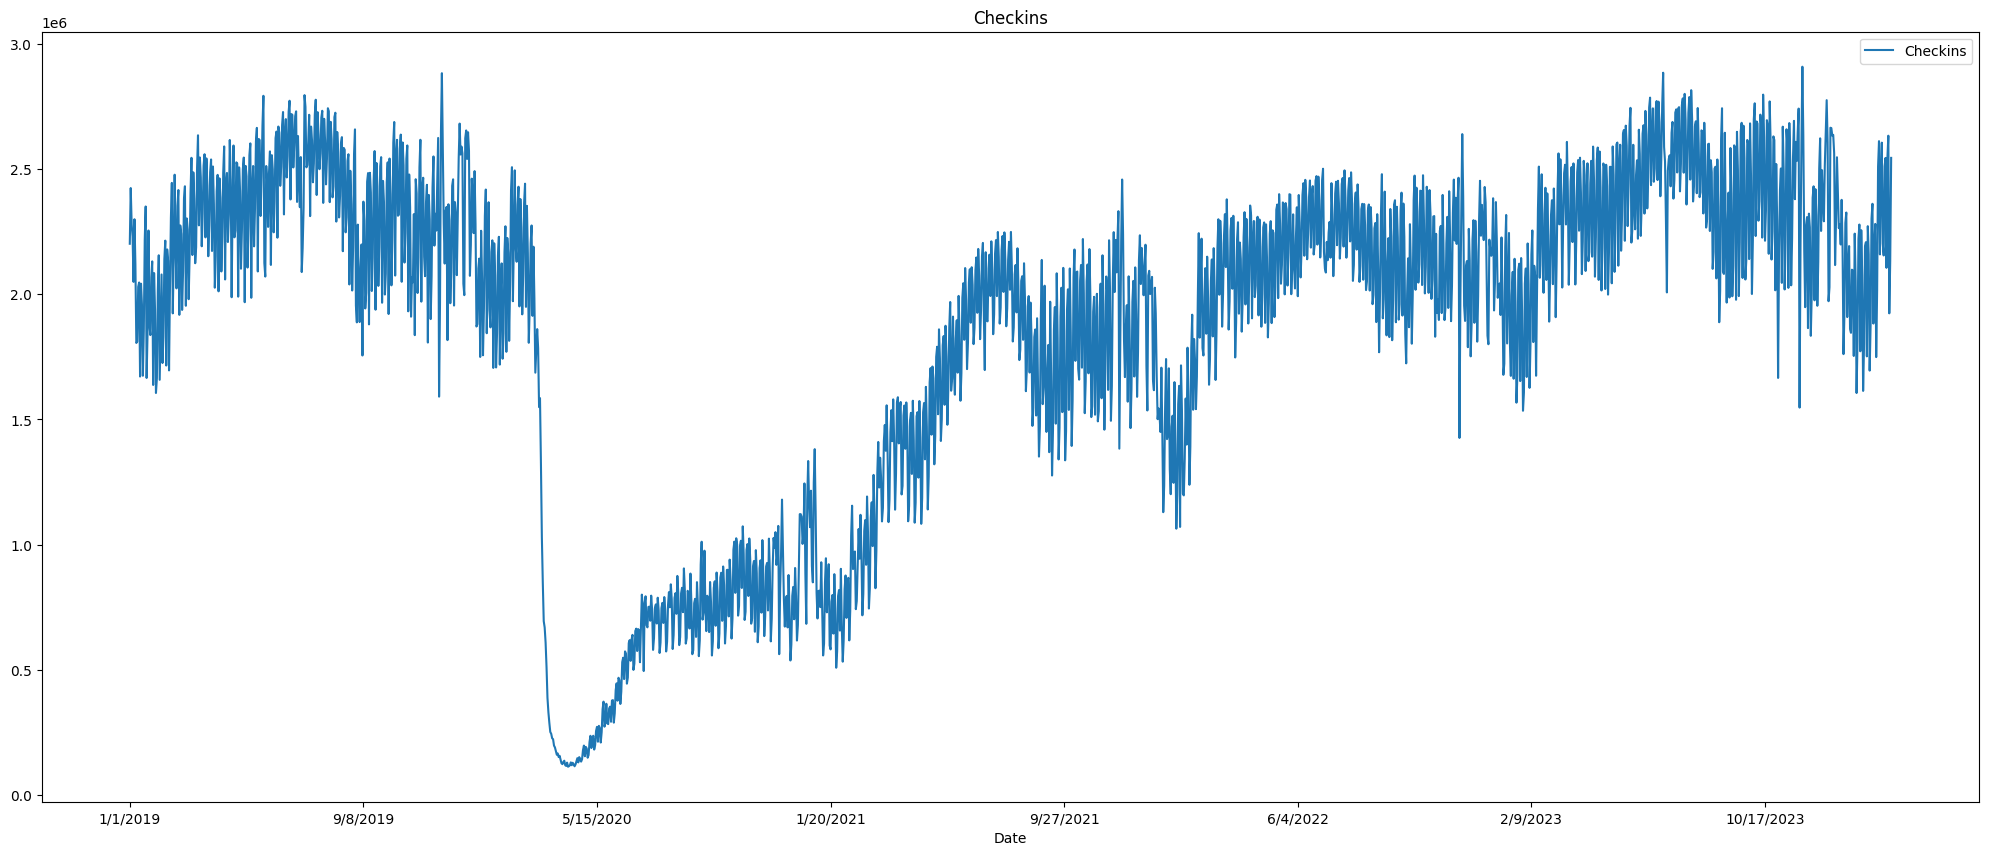

In [33]:
# Plotting the data 
checkin_data.set_index('Date').plot(figsize=(25, 10), title="Checkins")

From the graph we clearly see that TSA checkins got seriously dropped due to COVID lockdowns, making this year of data an outlier. Moreover, we should note the stoichasticity from week to week. Finally, we see trend like data from 2020 --> 2023

,Checkins
count,1.886000e+03
mean,1.866805e+06
std,6.745331e+05
min,1.131470e+05
25%,1.554252e+06
50%,2.069120e+06
75%,2.360244e+06
max,2.908785e+06


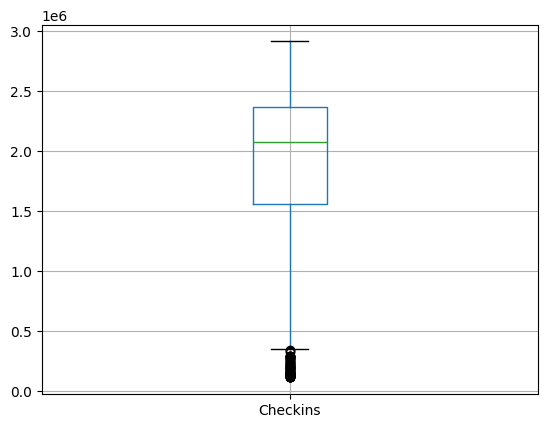

In [34]:
# Elementary statistics of the data 
checkin_data.boxplot(column='Checkins')
checkin_data.describe()

<Axes: title={'center': ' Frequency Distrbution of Checkins'}, ylabel='Frequency'>

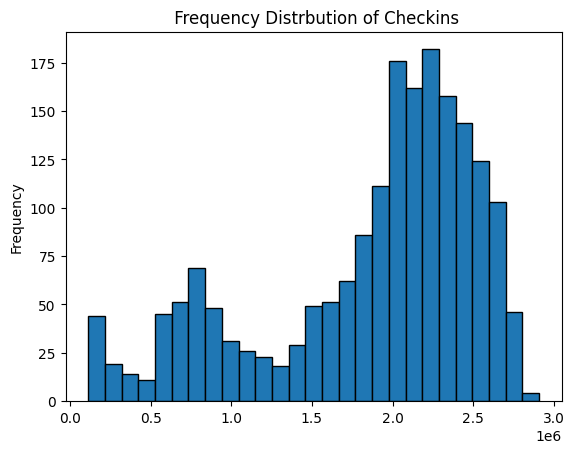

In [35]:
# Creating distribution of values
bin_width = 100_000
num_bins = (max(checkin_data['Checkins']) - min(checkin_data['Checkins'])) / bin_width
checkin_data['Checkins'].plot(kind='hist', edgecolor='black', bins=int(num_bins), title=' Frequency Distrbution of Checkins')

When looking at the above dataset we see a bimodal distribution of results with peaks at 0.8m and 2m checkins. Again, we know that COVID lockdowns were the external force creating the bimodal look 

## Transforming the Data

Due to the outlying nature of COVID lockdowns we will data that was collected during the travel restrictions. This is defined as 2/2/2020, when the US began its first air travel restrictions to 11/8/2021 when the US reopened to UK and Europe. 

In [36]:
checkin_data['Date'] = pd.to_datetime(checkin_data['Date'])
restrictions_start = '2/2/2020'
restrictions_end = '11/8/2021'
checkins_ex_covid = checkin_data[(checkin_data['Date'] < restrictions_start) | (checkin_data['Date'] > restrictions_end)]

And now let's look at the distribution on the ex-covid data 

<Axes: title={'center': ' Frequency Distrbution of Checkins Ex-COVID'}, ylabel='Frequency'>

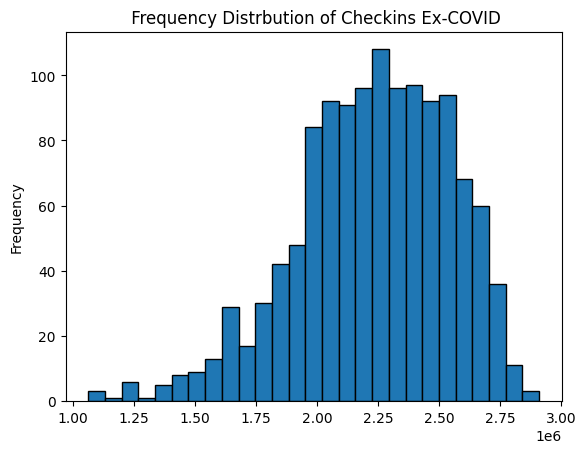

In [37]:
checkins_ex_covid['Checkins'].plot(kind='hist', edgecolor='black', bins=int(num_bins), title=' Frequency Distrbution of Checkins Ex-COVID')

Without the COVID data the distribution looks more normal with a left skew. We see smaller values more frequently and this may be due to residual affects of the COVID lockdowns immediately following the restriction lift. Moreover, the lift began gradually rather than allowing all international travel